In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
import pandas as pd
test_d=pd.read_csv('kc_house_data[1].csv')

In [5]:
print(test_d.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955 

In [6]:
test_d['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

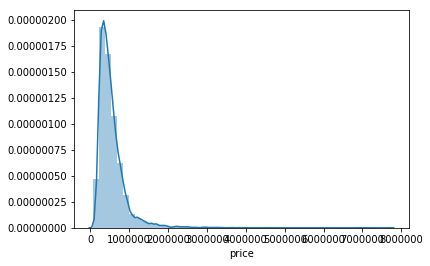

In [7]:
import seaborn as sns
sns.distplot(test_d['price']);

In [8]:
print("Skewness: %f" % test_d['price'].skew())

Skewness: 4.024069


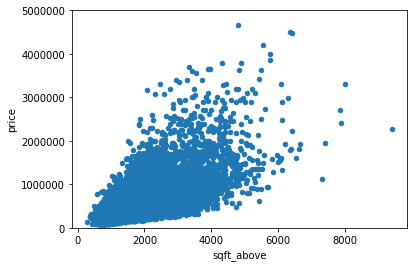

In [9]:
var = 'sqft_above'
data = pd.concat([test_d['price'], test_d[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,5000000));

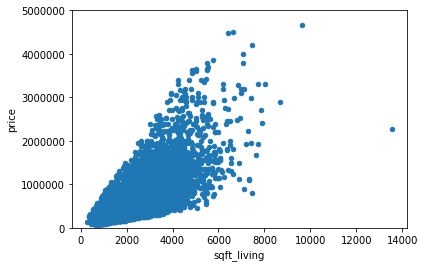

In [10]:
var = 'sqft_living'
data = pd.concat([test_d['price'], test_d[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,5000000));

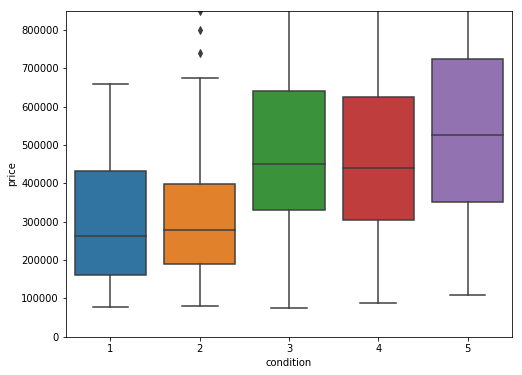

In [11]:
#box plot overallqual/saleprice
import matplotlib.pyplot as plt
var = 'condition'
data = pd.concat([test_d['price'], test_d[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=850000);

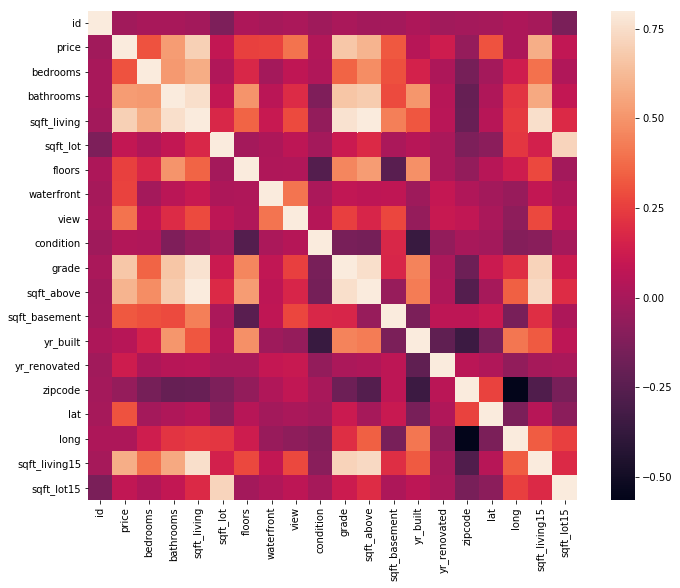

In [12]:
corrmat = test_d.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

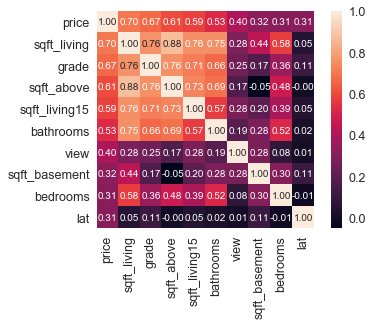

In [13]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(test_d[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [15]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(9, input_shape=(9,) , kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


cols = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view','sqft_basement','bedrooms','lat']
X = test_d[cols] 
Y = test_d['price']

In [16]:
model = baseline_model()
# Fit the model
model.fit(X, Y, validation_data=(X, Y), epochs=30, batch_size=1000,verbose=2)

Train on 21613 samples, validate on 21613 samples
Epoch 1/30
 - 0s - loss: 426468304570.6965 - val_loss: 426441322285.4482
Epoch 2/30
 - 0s - loss: 426417467930.4138 - val_loss: 426385834121.9673
Epoch 3/30
 - 0s - loss: 426343602799.9800 - val_loss: 426283457791.7039
Epoch 4/30
 - 0s - loss: 426205399215.3967 - val_loss: 426099539631.4203
Epoch 5/30
 - 0s - loss: 425976652981.6980 - val_loss: 425820290608.0659
Epoch 6/30
 - 0s - loss: 425652397688.7451 - val_loss: 425444435750.3414
Epoch 7/30
 - 0s - loss: 425234506171.8455 - val_loss: 424975368017.6457
Epoch 8/30
 - 0s - loss: 424723696607.0717 - val_loss: 424417711908.2567
Epoch 9/30
 - 0s - loss: 424123684809.5143 - val_loss: 423770993166.2847
Epoch 10/30
 - 0s - loss: 423434399174.1267 - val_loss: 423036974809.5876
Epoch 11/30
 - 0s - loss: 422660659758.0286 - val_loss: 422216874929.0194
Epoch 12/30
 - 0s - loss: 421801323935.4655 - val_loss: 421315802990.1678
Epoch 13/30
 - 0s - loss: 420861409156.9097 - val_loss: 420329025967.52